Actividad 5: Optimización de Colonia de Hormigas

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
plt.style.use("ggplot")

In [11]:
def distance(c1, c2):
  return np.sqrt(np.sum((c1-c2) ** 2))

In [12]:
def get_cost(tour, cities):
  d = 0
  for i in range(len(tour)):
    c1 = cities[tour[i]]
    if i + 1 == len(tour):
      c2 = cities[tour[0]]
    else:
      c2 = cities[tour[i+1]]
    d += distance(c1,c2)
  return d

In [13]:
def get_choices(cities, last_city, excluded, pheromones, alpha, beta):
  choices = []
  for i,j in enumerate(cities):
    if i not in excluded:
      d = distance(cities[last_city], j)
      history = pheromones[last_city, i] ** alpha
      heuristic = (1 / d) ** beta
      prob = {
          "city": i,
          "distance": d,
          "prob": history * heuristic
      }
      choices.append(prob)
  return choices

In [14]:
def select_next(choices):
  psum = sum(map(lambda x: x["prob"], choices))
  if psum == 0:
    rand = np.random.randint(len(choices))
    return choices[rand]["city"]
  p = np.random.uniform()
  for i in choices:
    p -= i["prob"] / psum
    if p <= 0:
      return i["city"]
  return choices[-1]["city"]

In [15]:
def generate_tour(cities, pheromones, alpha, beta):
  tour = [np.random.randint(len(cities))]
  while len(tour) < len(cities):
    choices = get_choices(cities, tour[-1], tour, pheromones, alpha, beta)
    next_element = select_next(choices)
    tour.append(next_element)
  return tour

In [16]:
def update_pheromones(pheromones, rho, solutions):
  pheromones *= (1 - rho)
  for i in solutions:
    for j,row in enumerate(i["tour"]):
      if j == len(i["tour"]) - 1:
        col = i["tour"][0]
      else:
        col = i["tour"][j+1]
      pheromones[row,col] += 1 / i["cost"]
      pheromones[col,row] += 1 / i["cost"]
  return pheromones

**Problema de 70 ciudades (Smith/Thompson)**

nombre: st70

In [17]:
cities = pd.read_csv('/content/Coordenadas_reto.csv').to_numpy()

In [18]:
def ACO(alpha, beta, rho, max_iter, n_ants, cities):
  start = time.time()
  tour = np.random.permutation(len(cities))

  best = {
      "tour": tour,
      "cost": get_cost(tour, cities)
  }

  pheromones = np.ones((len(cities), len(cities)))
  for i in range(max_iter):
    solutions = []
    for j in range(n_ants):
      tour = generate_tour(cities, pheromones, alpha, beta)
      candidate = {
          "tour": tour,
          "cost": get_cost(tour, cities)
      }
      solutions.append(candidate)
      if candidate["cost"] < best["cost"]:
        best = candidate
        print(f"New best found - {best}")
      pheromones = update_pheromones(pheromones, rho, solutions)




  x = [cities[c,0] for c in best["tour"]] + [cities[best["tour"][0], 0]]
  y = [cities[c,1] for c in best["tour"]] + [cities[best["tour"][0], 1]]
  plt.title("ACO TSP")
  plt.plot(x,y,"c",x,y,"ro")
  plt.show()

  end = time.time()

  print(f"Time elapsed: {end-start:.3f}s")
  return best

### Solución estándar.

<ipython-input-13-c1895a11a300>:7: RuntimeWarning: divide by zero encountered in double_scalars
  heuristic = (1 / d) ** beta
<ipython-input-14-950dd524cbd3>:8: RuntimeWarning: invalid value encountered in double_scalars
  p -= i["prob"] / psum


New best found - {'tour': [55, 4, 91, 16, 19, 90, 83, 89, 80, 88, 77, 87, 86, 85, 84, 82, 78, 81, 79, 73, 74, 76, 29, 27, 28, 30, 31, 21, 75, 37, 36, 38, 47, 42, 43, 25, 44, 46, 35, 56, 49, 72, 71, 12, 70, 68, 69, 67, 66, 65, 61, 64, 59, 11, 63, 62, 60, 33, 58, 57, 52, 26, 24, 22, 20, 18, 54, 8, 9, 10, 2, 23, 0, 6, 40, 50, 48, 32, 34, 5, 45, 3, 53, 1, 13, 15, 51, 39, 7, 17, 41, 14], 'cost': 5134.715281069394}
New best found - {'tour': [85, 91, 80, 90, 84, 89, 83, 88, 81, 87, 86, 82, 78, 79, 77, 63, 65, 67, 59, 64, 66, 70, 69, 21, 76, 60, 75, 74, 71, 72, 0, 5, 73, 23, 31, 30, 27, 28, 29, 35, 12, 68, 61, 62, 37, 36, 33, 58, 57, 3, 44, 54, 55, 50, 56, 45, 48, 49, 2, 52, 25, 4, 8, 9, 10, 6, 42, 43, 41, 17, 53, 1, 20, 18, 51, 39, 16, 19, 15, 13, 47, 38, 32, 34, 11, 26, 24, 22, 14, 40, 46, 7], 'cost': 4692.666225553086}
New best found - {'tour': [54, 46, 55, 0, 53, 1, 19, 91, 90, 79, 89, 81, 88, 80, 87, 86, 85, 84, 83, 82, 77, 78, 16, 12, 76, 22, 75, 74, 73, 72, 71, 62, 70, 63, 65, 64, 59, 6

<ipython-input-13-c1895a11a300>:11: RuntimeWarning: invalid value encountered in double_scalars
  "prob": history * heuristic


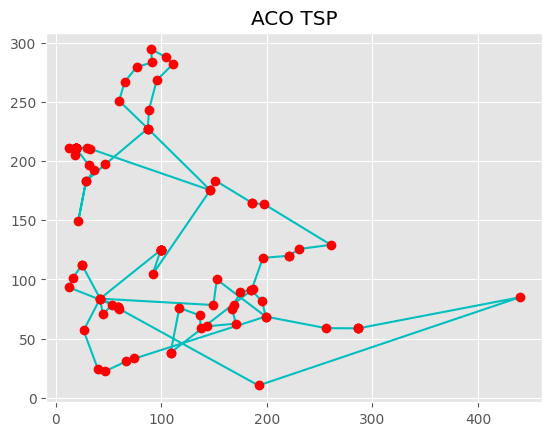

Time elapsed: 480.416s


In [19]:
best = ACO(
alpha = 1,
beta = 2,
rho = 0.5,
max_iter = 100,
n_ants = len(cities),
cities = cities)

Solución con menor número de hormigas

<ipython-input-13-c1895a11a300>:7: RuntimeWarning: divide by zero encountered in double_scalars
  heuristic = (1 / d) ** beta
<ipython-input-14-950dd524cbd3>:8: RuntimeWarning: invalid value encountered in double_scalars
  p -= i["prob"] / psum


New best found - {'tour': [70, 64, 67, 66, 65, 40, 45, 56, 5, 91, 90, 79, 89, 84, 88, 85, 87, 86, 83, 82, 80, 81, 78, 77, 74, 76, 18, 75, 73, 72, 71, 60, 69, 49, 68, 61, 63, 62, 16, 13, 59, 41, 43, 42, 47, 52, 3, 2, 50, 48, 25, 34, 58, 57, 46, 55, 54, 0, 31, 29, 30, 28, 27, 38, 36, 37, 33, 32, 11, 53, 1, 39, 7, 12, 20, 17, 51, 19, 15, 24, 26, 44, 4, 10, 9, 8, 6, 23, 21, 35, 22, 14], 'cost': 4915.245704744004}
New best found - {'tour': [72, 60, 91, 89, 86, 90, 77, 88, 83, 87, 85, 84, 82, 80, 81, 79, 78, 74, 76, 39, 51, 1, 18, 75, 24, 7, 19, 73, 69, 70, 68, 61, 71, 67, 65, 66, 64, 59, 62, 32, 34, 63, 29, 28, 27, 30, 31, 25, 22, 58, 57, 14, 13, 56, 45, 50, 55, 46, 54, 3, 43, 42, 6, 8, 9, 10, 17, 20, 12, 53, 15, 11, 16, 44, 2, 52, 49, 48, 40, 38, 36, 37, 47, 41, 33, 26, 21, 35, 0, 5, 23, 4], 'cost': 4614.031463152618}
New best found - {'tour': [12, 91, 90, 82, 89, 84, 88, 87, 86, 85, 83, 78, 81, 80, 79, 77, 73, 74, 76, 22, 75, 72, 71, 67, 66, 68, 69, 70, 65, 64, 59, 5, 63, 62, 61, 60, 7, 2

<ipython-input-13-c1895a11a300>:11: RuntimeWarning: invalid value encountered in double_scalars
  "prob": history * heuristic


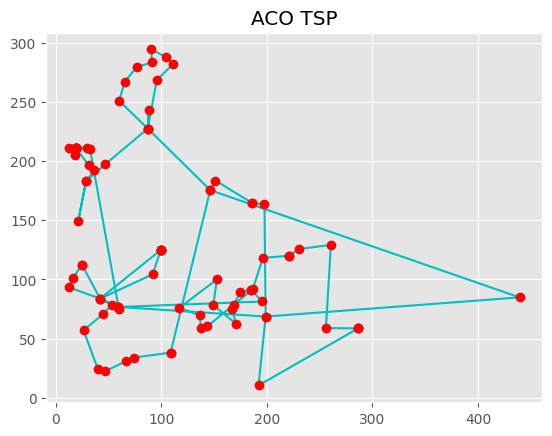

Time elapsed: 223.041s


In [27]:
best = ACO(
alpha = 1,
beta = 2,
rho = 0.5,
max_iter = 100,
n_ants = int(len(cities)*0.5),
cities = cities)

Solución con menor número de iteraciones

New best found - {'tour': [14, 18, 91, 90, 86, 89, 84, 88, 78, 87, 85, 83, 82, 77, 81, 80, 79, 72, 71, 74, 76, 27, 28, 29, 30, 31, 35, 73, 75, 42, 43, 37, 36, 38, 40, 52, 2, 50, 70, 63, 61, 69, 66, 67, 60, 68, 65, 64, 59, 62, 25, 7, 51, 39, 53, 58, 57, 13, 56, 4, 55, 54, 46, 45, 32, 34, 49, 48, 44, 0, 20, 17, 47, 41, 9, 10, 8, 22, 33, 3, 5, 23, 6, 1, 15, 11, 26, 24, 12, 21, 16, 19], 'cost': 4717.820962119139}


<ipython-input-13-c1895a11a300>:7: RuntimeWarning: divide by zero encountered in double_scalars
  heuristic = (1 / d) ** beta
<ipython-input-14-950dd524cbd3>:8: RuntimeWarning: invalid value encountered in double_scalars
  p -= i["prob"] / psum


New best found - {'tour': [12, 91, 90, 87, 89, 77, 88, 71, 74, 86, 85, 84, 83, 82, 80, 81, 79, 78, 22, 76, 75, 73, 72, 11, 70, 59, 64, 69, 68, 67, 66, 65, 61, 63, 60, 62, 51, 39, 3, 2, 40, 38, 36, 37, 50, 58, 57, 54, 55, 56, 52, 45, 29, 28, 27, 31, 30, 35, 32, 34, 53, 1, 7, 19, 49, 48, 4, 47, 25, 17, 46, 44, 0, 21, 24, 18, 20, 16, 13, 15, 26, 10, 9, 8, 6, 41, 42, 43, 33, 5, 23, 14], 'cost': 4343.748328903495}
New best found - {'tour': [39, 51, 13, 91, 90, 78, 89, 82, 88, 85, 87, 86, 84, 83, 81, 80, 79, 77, 74, 76, 21, 75, 16, 19, 73, 68, 67, 66, 64, 65, 60, 72, 71, 61, 70, 69, 62, 63, 30, 31, 29, 28, 27, 18, 59, 33, 58, 57, 0, 45, 10, 9, 8, 56, 52, 2, 53, 1, 7, 15, 11, 55, 54, 46, 3, 41, 40, 42, 43, 47, 17, 20, 12, 24, 26, 22, 48, 50, 49, 44, 4, 38, 37, 36, 34, 32, 35, 25, 23, 5, 6, 14], 'cost': 4287.412948198986}
New best found - {'tour': [80, 91, 90, 79, 89, 87, 88, 78, 86, 85, 84, 83, 82, 81, 77, 73, 72, 75, 76, 74, 71, 12, 70, 69, 60, 68, 66, 67, 64, 59, 47, 40, 37, 36, 38, 41, 43,

<ipython-input-13-c1895a11a300>:11: RuntimeWarning: invalid value encountered in double_scalars
  "prob": history * heuristic


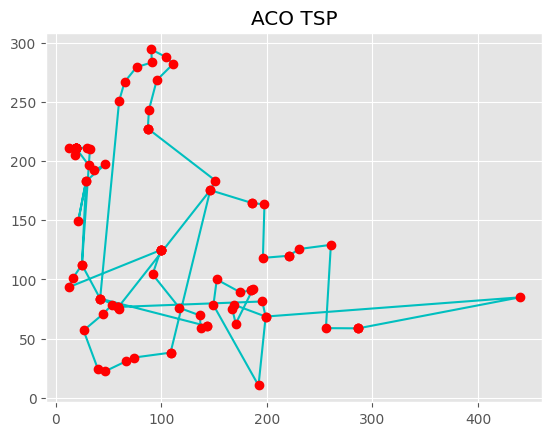

Time elapsed: 229.488s


In [29]:
best = ACO(
alpha = 1,
beta = 2,
rho = 0.5,
max_iter = 50,
n_ants = len(cities),
cities = cities)